In [1]:
#!pip install mxnet
#!pip install d2l

from mxnet import autograd, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()


In [2]:
net_BN = nn.Sequential()
net_BN.add(nn.Conv2D(6, kernel_size=5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Conv2D(16, kernel_size=5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Dense(120),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(84),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(10))

In [3]:
net = nn.Sequential()
net.add(nn.Conv2D(6, kernel_size=5),
        nn.Activation('sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Conv2D(16, kernel_size=5),
        nn.Activation('sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Dense(120),
        nn.Activation('sigmoid'),
        nn.Dense(84),
        nn.Activation('sigmoid'),
        nn.Dense(10))

In [4]:
num_epochs, batch_size = 10, 256
lr1 = 1.0
lr2 = 1.5
lr3 = 2.0
lr4 = 3.0
lr5 = 5.0
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

loss 0.261, train acc 0.903, test acc 0.823
3413.7 examples/sec on cpu(0)


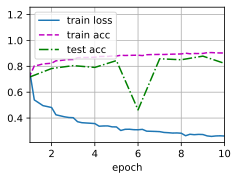

In [5]:
d2l.train_ch6(net_BN, train_iter, test_iter, num_epochs, lr1, d2l.try_gpu())

loss 0.271, train acc 0.900, test acc 0.787
3445.1 examples/sec on cpu(0)


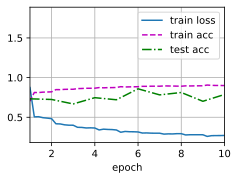

In [6]:
d2l.train_ch6(net_BN, train_iter, test_iter, num_epochs, lr2, d2l.try_gpu())

loss 0.271, train acc 0.899, test acc 0.877
3441.2 examples/sec on cpu(0)


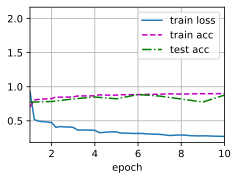

In [7]:
d2l.train_ch6(net_BN, train_iter, test_iter, num_epochs, lr3, d2l.try_gpu())

loss 0.271, train acc 0.900, test acc 0.859
3440.7 examples/sec on cpu(0)


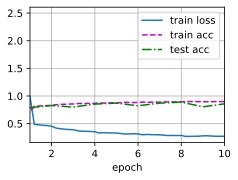

In [8]:
d2l.train_ch6(net_BN, train_iter, test_iter, num_epochs, lr4, d2l.try_gpu())

loss 0.262, train acc 0.903, test acc 0.815
3480.3 examples/sec on cpu(0)


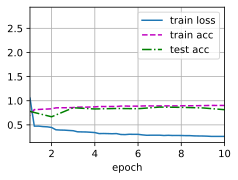

In [9]:
d2l.train_ch6(net_BN, train_iter, test_iter, num_epochs, lr5, d2l.try_gpu())

loss 0.505, train acc 0.804, test acc 0.792
3904.8 examples/sec on cpu(0)


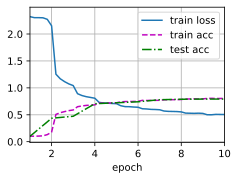

In [10]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr1, d2l.try_gpu())

loss 0.464, train acc 0.822, test acc 0.825
3789.0 examples/sec on cpu(0)


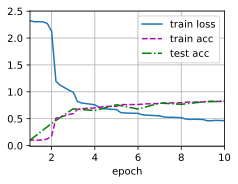

In [11]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr2, d2l.try_gpu())

loss 0.443, train acc 0.833, test acc 0.806
3908.7 examples/sec on cpu(0)


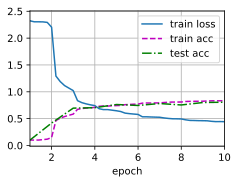

In [12]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr3, d2l.try_gpu())

loss 0.493, train acc 0.809, test acc 0.819
4046.3 examples/sec on cpu(0)


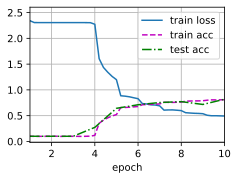

In [13]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr4, d2l.try_gpu())

loss 2.308, train acc 0.100, test acc 0.100
4030.0 examples/sec on cpu(0)


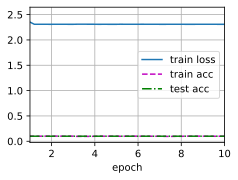

In [14]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr5, d2l.try_gpu())

In [1]:
lr_list = [1.0, 1.5, 2.0, 3.0, 5.0]
train_BN = [0.903, 0.900, 0.988, 0.900, 0.903]
train = [0.792, 0.822, 0.833, 0.809, 0.100 ]
test_BN = [0.823, 0.787, 0.877, 0.859, 0.815]
test = [0.792, 0.825, 0.806, 0.819, 0.100 ]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

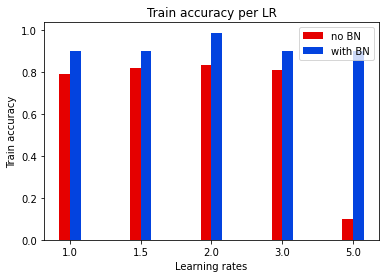

In [14]:
fig, ax = plt.subplots()
x = np.arange(len(train))
width = 0.15
ax.bar(x - width/2, train, width, label='no BN', color='#e50000')
ax.bar(x + width/2, train_BN, width, label='with BN', color='#0343df')
ax.set_ylabel('Train accuracy')
ax.set_xlabel('Learning rates')
ax.set_title('Train accuracy per LR')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(lr_list)
ax.legend()


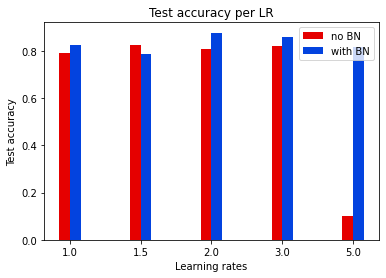

In [16]:
fig, ax = plt.subplots()
x = np.arange(len(train))
width = 0.15
ax.bar(x - width/2, test, width, label='no BN', color='#e50000')
ax.bar(x + width/2, test_BN, width, label='with BN', color='#0343df')
ax.set_ylabel('Test accuracy')
ax.set_xlabel('Learning rates')
ax.set_title('Test accuracy per LR')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(lr_list)
ax.legend()
